<a href="https://colab.research.google.com/github/AvaCook/cs315/blob/main/QuicksortPoCkey_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Template for testing Quick-Sort on small lists, outputing each intermediate step

In [2]:

import random
import time
import matplotlib.pyplot as plt

In [3]:

# Partition function
def Partition(A, p, r):
    x = A[r]
    i = p - 1
    for j in range(p, r):
        if A[j] <= x:
            i = i + 1
            # swap A[i] <--> A[j]
            A[i], A[j] = A[j], A[i]
    # swap A[i+1] <--> A[r]
    A[i+1], A[r] = A[r], A[i+1]
    return i + 1


In [4]:

# Quicksort implementation
def Quicksort(A, p, r, print_flag=False):
    if p < r:
        q = Partition(A, p, r)
        if print_flag:
            print(A)
        Quicksort(A, p, q-1, print_flag)
        Quicksort(A, q+1, r, print_flag)
    return A

In [5]:
# Wrapper to call Quicksort easily
def quicksort_driver(A, print_flag=False):
    return Quicksort(A, 0, len(A)-1, print_flag)

# Generate random list
def generate_random_list(n):
    return [random.randint(1, 1000000) for _ in range(n)]

# Timing wrapper
def time_algorithm(algorithm, arr):
    start = time.time()
    algorithm(arr.copy())
    end = time.time()
    return end - start

# Test sizes for Quicksort (n log n so we can go bigger)
Ns = [1000, 2000, 5000, 10000, 20000, 40000]
times = []

for n in Ns:
    arr = generate_random_list(n)
    t = time_algorithm(quicksort_driver, arr)
    times.append(t)

N values: [1000, 2000, 5000, 10000, 20000, 40000]
Times: [0.002872943878173828, 0.005643129348754883, 0.014991998672485352, 0.033094167709350586, 0.07869386672973633, 0.15365314483642578]
Ratios (T(2n)/T(n)): [1.9642323651452283, 2.656681735603532, 2.2074553521731524, 2.3778771963949943, 1.9525428247683796]


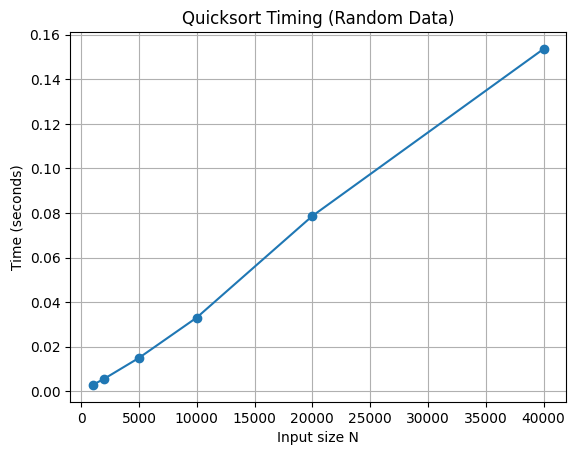

In [6]:
# Print results
print("N values:", Ns)
print("Times:", times)

# Ratio Test (expected ~2 since O(n log n))
ratios = []
for i in range(1, len(times)):
    ratios.append(times[i] / times[i-1])
print("Ratios (T(2n)/T(n)):", ratios)

# Plot
plt.plot(Ns, times, marker='o')
plt.xlabel('Input size N')
plt.ylabel('Time (seconds)')
plt.title('Quicksort Timing (Random Data)')
plt.grid(True)
plt.show()